In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Problem

To predict the Insurance claim using logistic regression. 
```

This dataset contains information on the insurance claim.
Each observation is different policyholders with various features like the age of the person, the gender of the policyholder, body mass index, providing an understanding of the body, number of children of the policyholder, smoking state of the policyholder and individual medical costs billed by health insurance.

```

##Features Info
```
age - age of policyholder 

sex - male(1)/female(0)

bmi - body mass index

children - number of children/dependents of policyholder

smoker - smoking state - nonsmoker(0)/smoker(1)

region - residential area - northeast(0)/northwest(1)/southeast(2)/southwest(3)

charges - medical cost

insuranceclaim - Target - yes(1)/no(0)
```

### Load the dataset


In [115]:

#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/Log_Reg/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Log_Reg/test.csv')

#Dropping df_train Id column : train_id
train_id = df_train['Id']
df_train.drop(['Id'], axis=1, inplace=True)

##Exporing the data

In [117]:
#First look at data
df_train.head(10)


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,25,0,30.300,0,0,3,2632.99200,1
1,26,0,19.800,1,0,3,3378.91000,0
2,44,1,31.350,1,1,0,39556.49450,1
3,44,1,30.690,2,0,2,7731.42710,0
4,29,0,24.600,2,0,3,4529.47700,0
5,47,0,29.370,1,0,2,8547.69130,0
6,24,0,33.990,0,0,2,2473.33410,1
7,26,0,22.230,0,0,1,3176.28770,0
8,18,0,28.215,0,0,0,2200.83085,1
9,58,0,33.100,0,0,3,11848.14100,1


In [118]:
# Data shape and columns
print(df_train.shape)
print(df_train.columns)

(1070, 8)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')


In [119]:
df_train.info()

# No missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1070 non-null   int64  
 1   sex             1070 non-null   int64  
 2   bmi             1070 non-null   float64
 3   children        1070 non-null   int64  
 4   smoker          1070 non-null   int64  
 5   region          1070 non-null   int64  
 6   charges         1070 non-null   float64
 7   insuranceclaim  1070 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 67.0 KB


In [120]:
# Describe data
df_train.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.030841,0.495327,30.490196,1.128037,0.203738,1.516822,13262.895208,0.568224
std,13.951271,0.500212,6.109707,1.211675,0.402965,1.110035,12125.948212,0.495555
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.030000,0.000000,0.000000,1.000000,4651.971162,0.000000
50%,39.000000,0.000000,30.140000,1.000000,0.000000,2.000000,9341.303300,1.000000
75%,51.000000,1.000000,34.320000,2.000000,0.000000,2.000000,17117.636460,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


##Visualizing the data

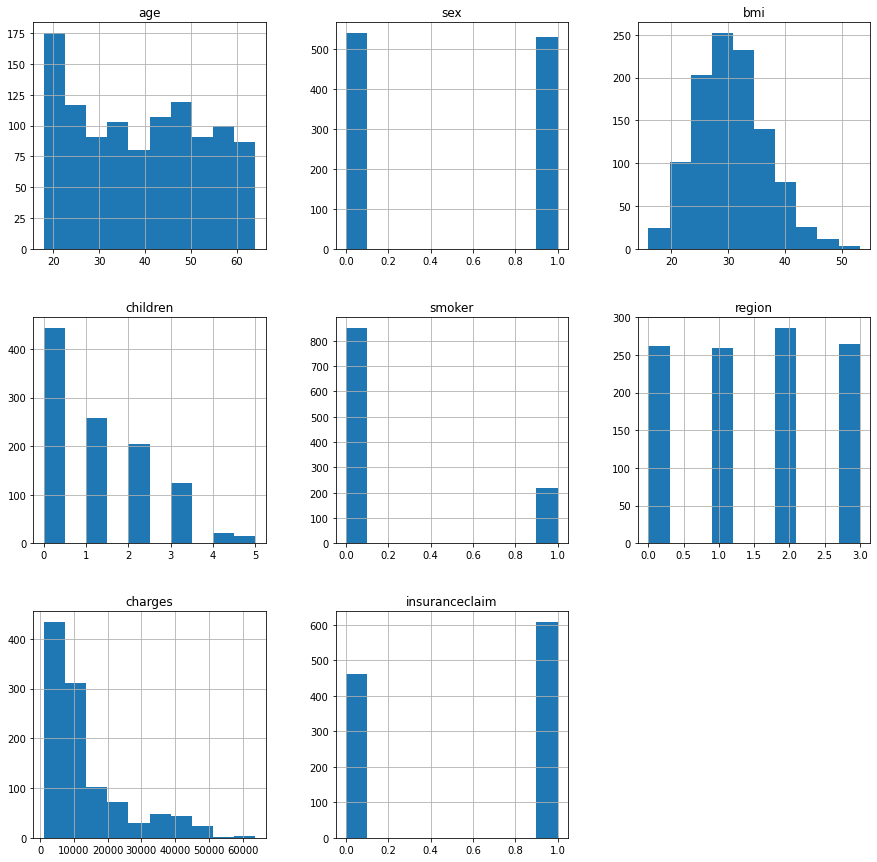

In [121]:
# Data distribution

data_distribution = df_train.hist(figsize=(15,15))
plt.show();

# Target variable i.e. insuranceclaim is not much imbalanced
#charges is right skewed (we can take log of it - normal distb)

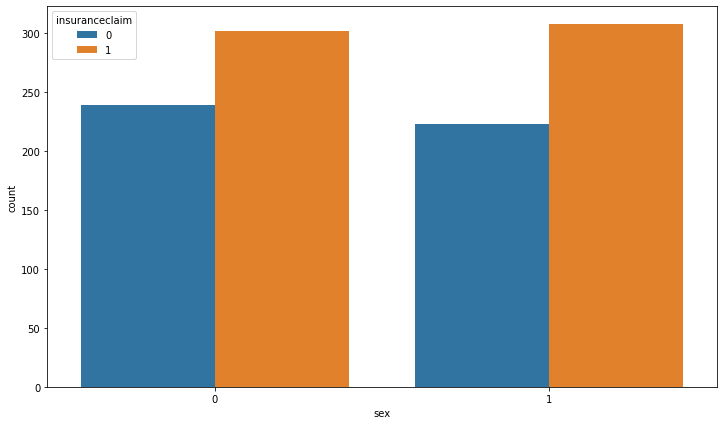

In [122]:
# Insurance claim w.r.t sex

plt.figure(figsize=(12,7))
sns.countplot(x='sex', hue='insuranceclaim', data=df_train);

#No pattern 
#I think it's not so important feature, we will see

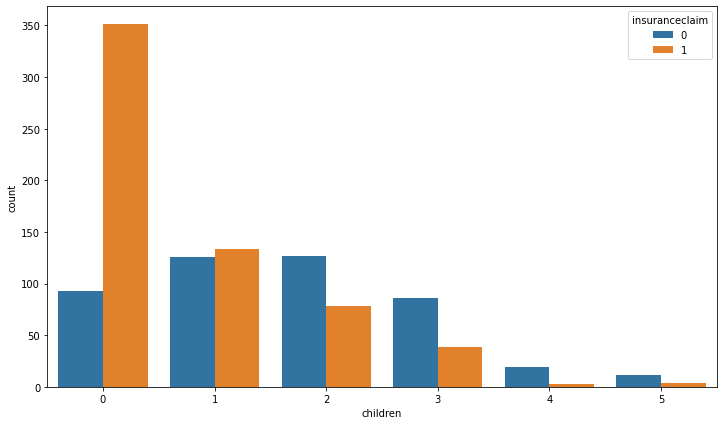

In [123]:
# Insurance claim w.r.t children

plt.figure(figsize=(12,7))
sns.countplot(x='children', hue='insuranceclaim', data=df_train);

#Observation - Less children, high chance to get a loan (No children - Very high)
# good feature

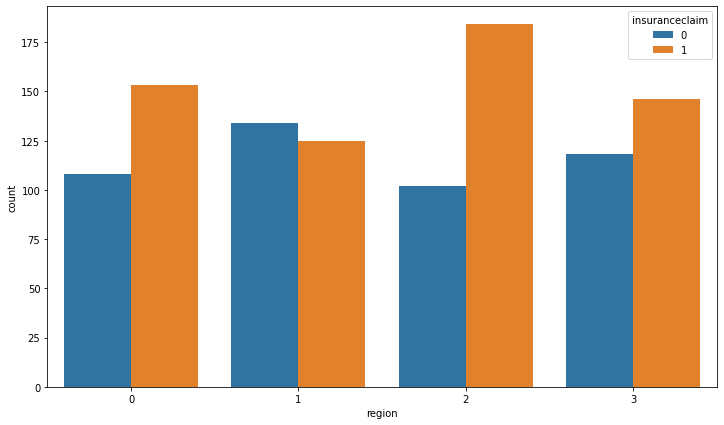

In [124]:
# Insurance claim w.r.t region

plt.figure(figsize=(12,7))
sns.countplot(x='region', hue='insuranceclaim', data=df_train);

#Observation - Region 2 i.e. southeast has high chance to get a loan

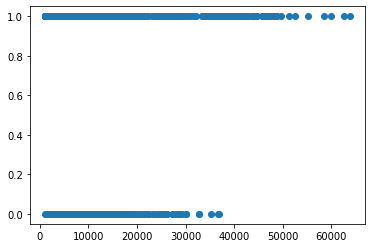

In [125]:
# Charges

plt.scatter(df_train['charges'], df_train['insuranceclaim']);

# No pattern

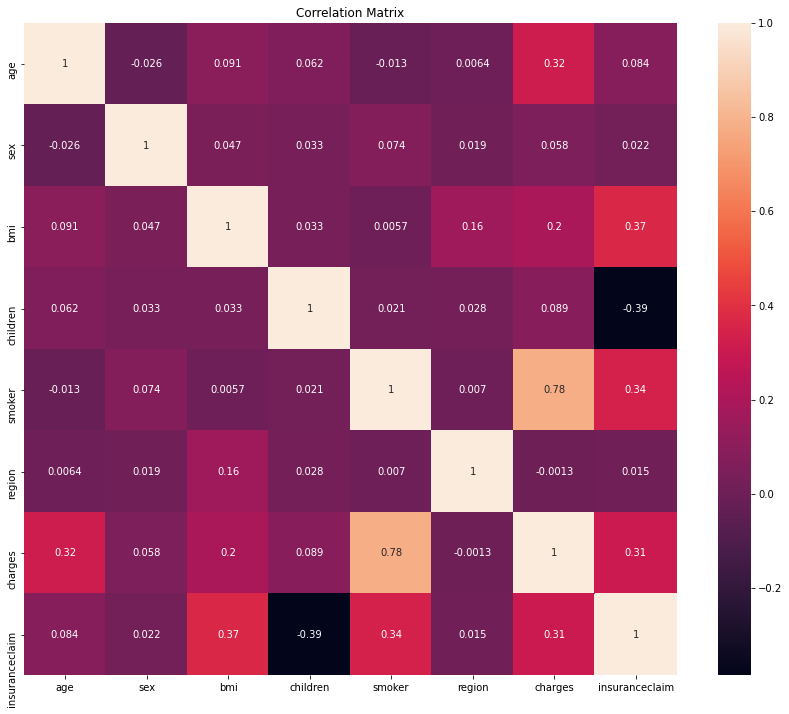

In [126]:
# correlation
corr = df_train.corr()

plt.figure(figsize=(15,12))
plt.title('Correlation Matrix')

sns.heatmap(corr,square=True,annot = True)
plt.show();

#bmi, smoker, charges are more correlated (positively) to insuranceclaim 
#children is correlated (negatively) to insuranceclaim

### Model building



In [127]:
# Code starts here

#Rightly skewed 'charges' to normal distb
df_train['charges'] = np.log(df_train['charges']) 

#Splitting training set
X=df_train[['bmi', 'smoker','children','charges']]
y=df_train['insuranceclaim']

print(X.head())
print(y.head())


#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)

# Code ends here.

     bmi  smoker  children    charges
0  30.30       0         0   7.875876
1  19.80       0         1   8.125308
2  31.35       1         1  10.585485
3  30.69       0         2   8.953049
4  24.60       0         2   8.418362
0    1
1    0
2    1
3    0
4    0
Name: insuranceclaim, dtype: int64
(802, 4)
(268, 4)


In [128]:
# fit the model
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 

# making predictions
y_pred = logreg.predict(X_valid)

#roc_auc score
roc=roc_auc_score(y_valid, y_pred)
print(roc)

# accuracy
acc = accuracy_score(y_valid, y_pred)
print(acc)



0.9072182793837632
0.9104477611940298


### Prediction on the test data and creating the sample submission file.

In [129]:
# Code starts here
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns
print(df_test.shape)
print(df_test.columns)

# Code ends here.

(268, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [130]:
#Rightly skewed 'charges' to normal distb
df_test['charges'] = np.log(df_test['charges']) 

#Features selected from test data
X_test=df_test[['bmi', 'smoker','children','charges']]

#make prediction : insuranceclaim
ytest_pred=logreg.predict(X_test)

#Making df for submission
subm=pd.DataFrame({"Id": test_id, "insuranceclaim": ytest_pred})
print(subm.head())

     Id  insuranceclaim
0   811               1
1   973               1
2   308               1
3   845               1
4  1050               1


In [131]:
# To CSV for submission
#subm.to_csv('submission_1.csv',index=False)

#from google.colab import files
#files.download('submission_1.csv') 